# Домашнее задине

## Тема “Элементы теории вероятностей”

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import itertools
import math

### Задание 1

Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
red = [32,19,21,25,34,27,36,30,23,5,16,1,14,9,18,7,12,3]
for i in range(0, 5):
    a = input()
    x = np.random.randint(0, 37)
    if x == 0:
        print("Zero")
    else:
        if x in red:
            print(x, 'красное')
        else:
            print(x, 'черное')


5 красное

10 черное

23 красное

3 красное

1 красное


### Задание 2

1. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.
2. Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

Вероятность выпадения числа в рулетке равна 1/37, следовательно вероятность выпадение двух чисел будет 1/37 + 1/37 = 2/37 ≈ 0.05405405405.

Пусть это будут числа 5 и 6. 

In [3]:
result = 0
for i in range(100000):
    x = np.random.randint(0, 37)
    if x == 5 or x == 6:
        result += 1
print(result/100000)

0.05405


0.05405 ≈ 0.05405

Text(0.5,1,'Histogram')

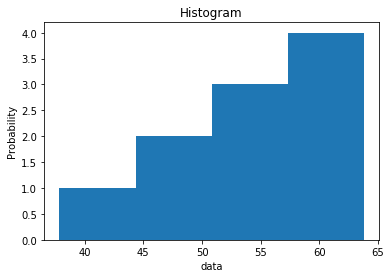

In [4]:
data = [0 for i in range(10)]
for i in range(10):
    k = 0
    for j in range(10):
        k += np.random.uniform(0, 10)
    data[i] = k
    
num_bins = 4
n, bins, patches = plt.hist(data, num_bins)
plt.xlabel('data')
plt.ylabel('Probability')
plt.title('Histogram')

### Задание 3

1. Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.
2. Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

Метод Монте-Карло

In [5]:
k, n = 0, 100
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
#print(a, b, c, d)
#print(x)
print(k, n, k/n)

37 100 0.37


In [6]:
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

In [7]:
def comb(n, k):
    return factorial(n) / factorial(k) / factorial(n - k)

In [8]:
def probability(p, q, n, k):
    return comb(n , k) * p**k * q**(n - k)
    

In [9]:
p = k/n
q = 1 - p

In [10]:
N = 100
K = 32
Ckn = comb(N, K)
P = probability(p, q, N, K)
Ckn, P

(1.4301250134917425e+26, 0.04931585144683128)

In [11]:
N = 12
K = 4
Ckn = comb(N, K)
P = probability(p, q, N, K)
Ckn, P

(495.0, 0.23021652322446892)

### Задание 4

Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [12]:
for p in itertools.permutations("012345",4):
    print(''.join(str(x) for x in p))

0123
0124
0125
0132
0134
0135
0142
0143
0145
0152
0153
0154
0213
0214
0215
0231
0234
0235
0241
0243
0245
0251
0253
0254
0312
0314
0315
0321
0324
0325
0341
0342
0345
0351
0352
0354
0412
0413
0415
0421
0423
0425
0431
0432
0435
0451
0452
0453
0512
0513
0514
0521
0523
0524
0531
0532
0534
0541
0542
0543
1023
1024
1025
1032
1034
1035
1042
1043
1045
1052
1053
1054
1203
1204
1205
1230
1234
1235
1240
1243
1245
1250
1253
1254
1302
1304
1305
1320
1324
1325
1340
1342
1345
1350
1352
1354
1402
1403
1405
1420
1423
1425
1430
1432
1435
1450
1452
1453
1502
1503
1504
1520
1523
1524
1530
1532
1534
1540
1542
1543
2013
2014
2015
2031
2034
2035
2041
2043
2045
2051
2053
2054
2103
2104
2105
2130
2134
2135
2140
2143
2145
2150
2153
2154
2301
2304
2305
2310
2314
2315
2340
2341
2345
2350
2351
2354
2401
2403
2405
2410
2413
2415
2430
2431
2435
2450
2451
2453
2501
2503
2504
2510
2513
2514
2530
2531
2534
2540
2541
2543
3012
3014
3015
3021
3024
3025
3041
3042
3045
3051
3052
3054
3102
3104
3105
3120
3124
3125
3140
3142


### Задание 5

Дополните код расчетом коэффициента корреляции x и y по формуле
<img src="formula.png" alt="Drawing">

In [13]:
n = 1000
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)

In [14]:
def average(value):
    result = 0
    for i in range(len(value)):
        result += value[i]
    return result / len(value)

In [15]:
def correlation(first, second):
    first_m = average(first)
    second_m = average(second)
    R_1 = 0
    R_2 = 0
    R_3 = 0
    for i in range(len(first)):
        R_1 += (first[i] - first_m) * (second[i] - second_m)
        R_2 += (first[i] - first_m)**2
        R_3 += (second[i] - second_m)**2
    return R_1 / math.sqrt(R_2 * R_3)

In [16]:
correlation(x, y)

0.9166715716823077